In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# B-Spline basic function definition
# It requires input i=,k=Degree of the function and u values which are knot values divided for generating curve
def N(i,k,u):
    #This has to be generated from knot vector function. Here its written manually
    #t=np.array([0., 0., 0., 1., 2., 3., 4., 4.,4.])
    if k==0:
        if t[i] <= u < t[i+1]:
            return 1
        else:
            return 0
    else:
        # If else loop is used to avoid division by zero.
        if (t[i+k]-t[i]) == 0:
            first_term=0
        else:
            first_term = ((u-t[i])*(N(i,k-1,u))/(t[i+k]-t[i]))
        if (t[i+k+1]-t[i+1]) == 0:
            second_term = 0
        else:
            second_term = ((t[i+k+1]-u)*(N(i+1,k-1,u))/(t[i+k+1]-t[i+1]))
        #return(((u-t[i])*(N(i,k-1,u))/(t[i+k-1]-t[i])) + ((t[i+k]-u)*(N(i+1,k-1,u))/(t[i+k]-t[i+1])))
        return(first_term+second_term)

In [11]:
#Parameters
control_points=5
n=control_points-1
degree=2
number_of_segments=n-(degree+1)+2
#u=np.arange(0,number_of_segments+1,1)

In [12]:
P = np.array([0., 0., 1., 0., 0.])
t=np.array([0., 0., 0., 1., 2., 3., 3., 3.])
#print(np.size(P))
size_of_u = 50
#i=np.size(P)
B_spline=np.zeros((size_of_u))
u_values=np.linspace(0,number_of_segments,size_of_u)
print(u_values)
for j,uu in enumerate(u_values):
    b_spline=0
    for ii in range(np.size(P)):
        #print(uu)
        b_spline = b_spline + N(ii,degree,uu)*P[ii]
        #print('y:',b_spline)
    B_spline[j] = b_spline
    #print(B_spline[j])
#print(B_spline)

[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


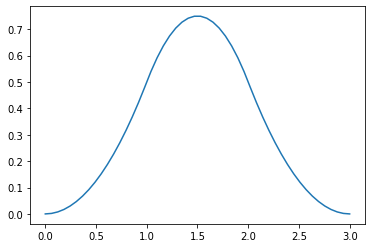

In [13]:
fig,ax=plt.subplots()
ax.plot(u_values,B_spline)